Stability of the Grid System
Electrical grids require a balance between electricity supply and demand in order to be stable. Conventional systems achieve this balance through demand-driven electricity production. For future grids with a high share of inflexible (i.e., renewable) energy source, the concept of demand response is a promising solution. This implies changes in electricity consumption in relation to electricity price changes. In this work, we’ll build a binary classification model to predict if a grid is stable or unstable using the UCI Electrical Grid Stability Simulated dataset.

Dataset: https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+

It has 12 primary predictive features and two dependent variables.

Predictive features:

'tau1' to 'tau4': the reaction time of each network participant, a real value within the range 0.5 to 10 ('tau1' corresponds to the supplier node, 'tau2' to 'tau4' to the consumer nodes);
'p1' to 'p4': nominal power produced (positive) or consumed (negative) by each network participant, a real value within the range -2.0 to -0.5 for consumers ('p2' to 'p4'). As the total power consumed equals the total power generated, p1 (supplier node) = - (p2 + p3 + p4);
'g1' to 'g4': price elasticity coefficient for each network participant, a real value within the range 0.05 to 1.00 ('g1' corresponds to the supplier node, 'g2' to 'g4' to the consumer nodes; 'g' stands for 'gamma');
Dependent variables:

'stab': the maximum real part of the characteristic differential equation root (if positive, the system is linearly unstable; if negative, linearly stable);
'stabf': a categorical (binary) label ('stable' or 'unstable').
Because of the direct relationship between 'stab' and 'stabf' ('stabf' = 'stable' if 'stab' <= 0, 'unstable' otherwise), 'stab' should be dropped and 'stabf' will remain as the sole dependent variable (binary classification).

Split the data into an 80-20 train-test split with a random state of “1”. Use the standard scaler to transform the train set (x_train, y_train) and the test set (x_test). Use scikit learn to train a random forest and extra trees classifier. And use xgboost and lightgbm to train an extreme boosting model and a light gradient boosting model. Use random_state = 1 for training all models and evaluate on the test set. 

Also, to improve the Extra Trees Classifier, you will use the following parameters (number of estimators, minimum number of samples, minimum number of samples for leaf node and the number of features to consider when looking for the best split) for the hyperparameter grid needed to run a Randomized Cross Validation Search (RandomizedSearchCV). 

n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Data/Test.csv')
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
data['stabf'] = data['stabf'].replace({'unstable':0,'stable':1})
data.drop('stab',1,inplace=True)

In [4]:
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0


In [5]:
X = data.drop('stabf',1)
y = data['stabf']

In [6]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
cols = list(data.columns)[:-1]
scaler = StandardScaler()
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

Question 1

In [7]:
TP = 355
FP = 1480
FN = 45
TN = 120

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

F1 = 2*((Precision*Recall)/(Precision+Recall))

round(F1,4)

0.3177

Question 4

In [8]:
recall = 82/(82+18)
fpr = 2/(98+2)
total_price = 5*2+18
recall,fpr,total_price # First option

(0.82, 0.02, 28)

In [9]:
recall = 79/(79+21)
fpr = 1/(99+1)
total_price = 5*1+21
recall,fpr,total_price # second option

(0.79, 0.01, 26)

In [10]:
recall = 90/(90+10)
fpr = 4/(96+4)
total_price = 5*4+10
recall,fpr,total_price # third option

(0.9, 0.04, 30)

In [11]:
recall = 78/(78+22)
fpr = 9/(91+9)
total_price = 5*9+22
recall,fpr,total_price # fourth option

(0.78, 0.09, 67)

Question 14

In [12]:
RFC = RandomForestClassifier(random_state=1)
RFC.fit(X_train,y_train)
round(RFC.score(X_test,y_test),4) #the default scoring metric is accuracy

0.9295

In [13]:
XGB = XGBClassifier(random_state=1)
XGB.fit(X_train,y_train)
round(XGB.score(X_test,y_test),4)

0.9455

Question 15

In [14]:
XGB.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)>

Olaide Joseph was helpful to point out that they upgraded xgboost recently (Aug 23 to be specific) so we should be careful with it. The default parameters of learning rate has been changed from 0.1 to 0.300000012 and the max_depth has been changed from 3 to 6. Hence, I will use the former defaut parameters below

In [15]:
XGB = XGBClassifier(random_state=1,learning_rate=0.1,max_depth=3)
XGB.fit(X_train,y_train)
round(XGB.score(X_test,y_test),4)

0.9195

In [16]:
XGB.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)>

Question 16

In [17]:
LGBM = LGBMClassifier(random_state=1)
LGBM.fit(X_train,y_train)
round(LGBM.score(X_test,y_test),4)

0.9375

Question 17

In [18]:
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}
ETC = ExtraTreesClassifier(random_state=1)
model = RandomizedSearchCV(estimator=ETC,
                          param_distributions=hyperparameter_grid,
                          cv=5,
                           n_iter=10,
                           scoring = 'accuracy', 
                           n_jobs = -1,verbose = 1,
                           random_state = 1)
model.fit(X_train,y_train)
model.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

Question 18

In [19]:
ETC_1 = ExtraTreesClassifier(random_state=1)
ETC_1.fit(X_train,y_train)
ETC_1.score(X_test,y_test)

0.9285

In [20]:
ETC_2 = ExtraTreesClassifier(random_state=1,n_estimators= 1000,min_samples_split= 2,min_samples_leaf= 8,max_features= None)
ETC_2.fit(X_train,y_train)
ETC_2.score(X_test,y_test)

0.927

Question 20

In [21]:
feature_importance = pd.DataFrame({'Column_name':cols,'Importance_score':ETC_2.feature_importances_})
feature_importance

,Column_name,Importance_score
0,tau1,0.137240
1,tau2,0.140508
2,tau3,0.134680
3,tau4,0.135417
4,p1,0.003683
5,p2,0.005337
6,p3,0.005429
7,p4,0.004962
8,g1,0.102562
9,g2,0.107578


In [22]:
feature_importance.sort_values('Importance_score',inplace=True,ascending=False)
feature_importance

,Column_name,Importance_score
1,tau2,0.140508
0,tau1,0.137240
3,tau4,0.135417
2,tau3,0.134680
10,g3,0.113063
11,g4,0.109541
9,g2,0.107578
8,g1,0.102562
6,p3,0.005429
5,p2,0.005337


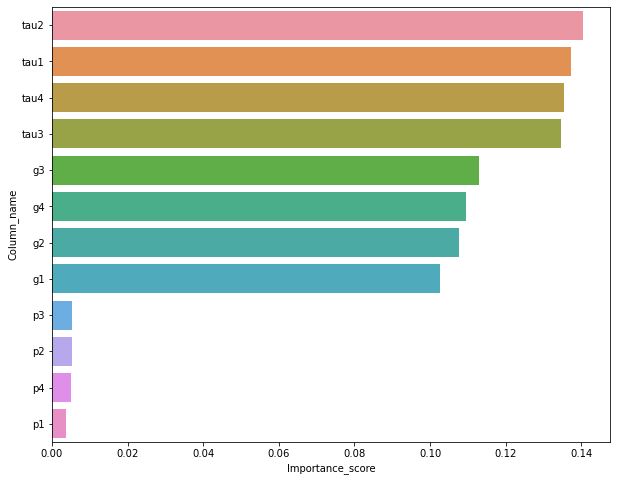

In [23]:
plt.figure(figsize=(10,8))
sns.barplot('Importance_score',
           'Column_name',
           data=feature_importance,
           orient='h');